<a href="https://colab.research.google.com/github/DataSEARCH-UOM/cricket_analytics/blob/master/scripts/capture_patterns-fft-convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 This example is using GYRO data x,y,z axis, from a WIMU device to demonstrate how to extract patterns from the WIMU logs. But don't get confused with that. Think of it as a signal with some noice.

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None                              # to get away from the huge warning list on the copy


In [0]:
df=pd.read_csv('../data/'+'WIMU_22-log_20200305-21_17_28.qul-GYRO.xml.csv')
df.head()

,time,x,y,z
0,127052166,-1.833128,3.201247,6.188703
1,127052176,-3.216080,2.814789,4.978779
2,127052186,-2.946732,4.065518,4.948121
3,127052196,-3.470409,4.497561,5.166888
4,127052206,-2.006280,3.984124,5.914111


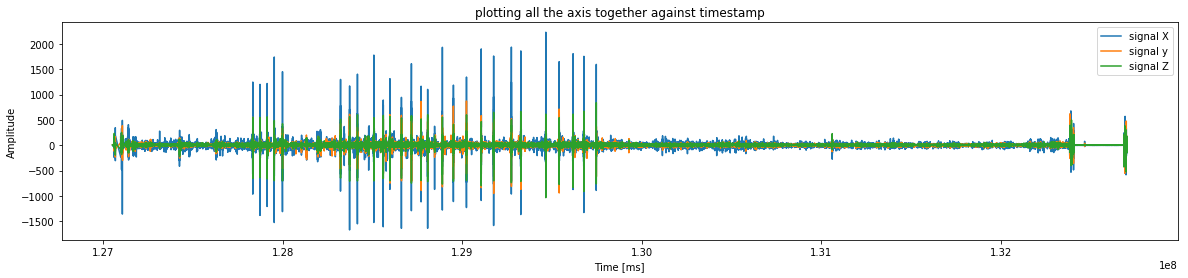

In [0]:
# plotting all the axis together
time=df['time']
signalX=df['x']
signalY=df['y']
signalZ=df['z']

fig = plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(time, signalX,label="signal X")
plt.plot(time, signalY,label="signal y")
plt.plot(time, signalZ,label="signal Z")
plt.legend()
plt.title('plotting all the axis together against timestamp')
plt.show()

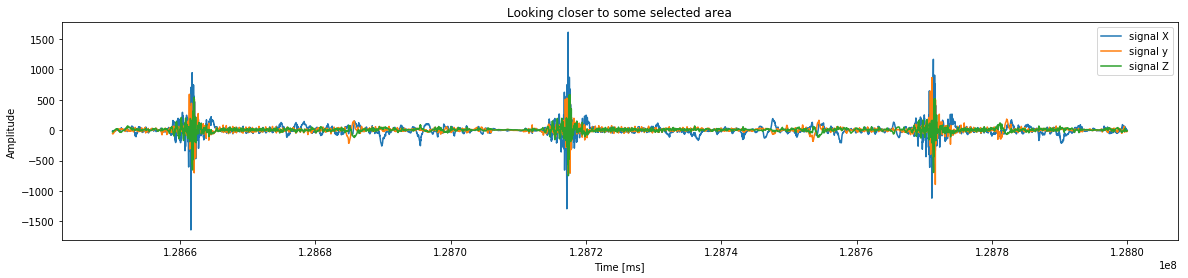

In [0]:
# lets take a closer look at some selected areas
dfS = df.loc[(df['time']>128650000) & (df['time']<128800000)]

fig = plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfS['time'], dfS['x'],label="signal X")
plt.plot(dfS['time'], dfS['y'],label="signal y")
plt.plot(dfS['time'], dfS['z'],label="signal Z")
plt.legend()
plt.title('Looking closer to some selected area')
plt.show()

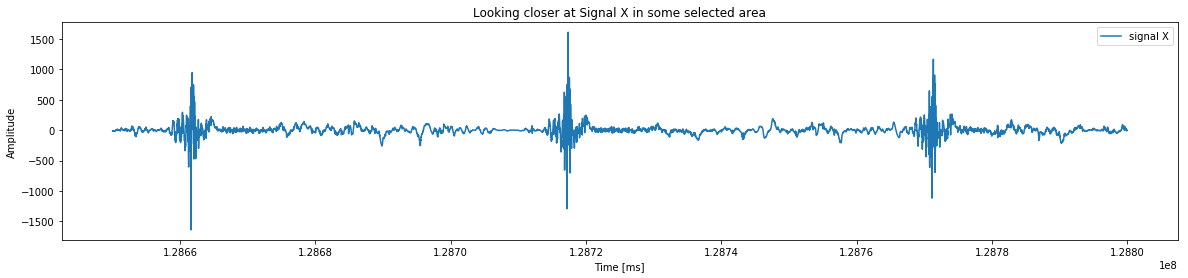

In [0]:
# For the simplicity lets pick signal x later we can join others in the final result
fig = plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfS['time'], dfS['x'],label="signal X")

plt.legend()
plt.title('Looking closer at Signal X in some selected area')
plt.show()

#### Now we have three sections of a similar signal. Obviously we can pick the patterns by inspecting them but that will delay our further analysis. So, lets see how we can extract these signals programatically

## Step 01 - Removing noice using Fourier Transformation

First I'm trying to see if we can use Fouriour transform to convert into the frequency domain and then remove some noice

In [0]:
import scipy.fftpack
import scipy.fftpack

In [0]:
s_sx = dfS['x']                             # Selected Signal x
s_t = dfS['time']                           # Selected Time

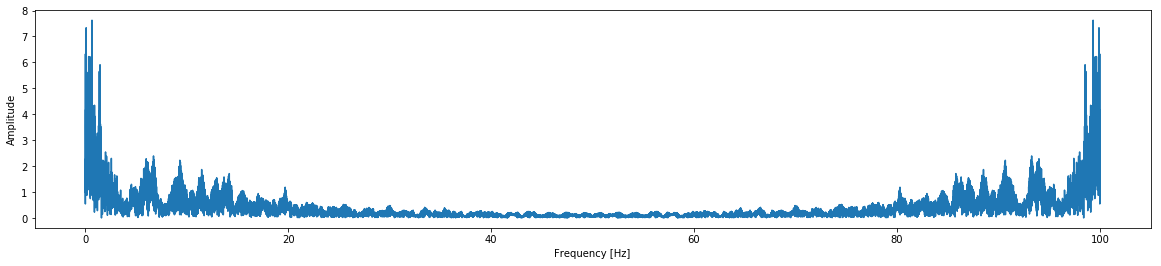

In [0]:
sfftx = scipy.fftpack.fft(s_sx)             # Selected Signal fft x
T = 10/1000                                 #Once ten miliseond   #t_s[1] - t_s[0]  # sampling interval 
N = s_s.size

# 1/T = frequency
f_s = np.linspace(0, 1 / T, N)              # Selected Frequency range

plt.figure(figsize=[20,4])

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f_s[1:N], np.abs(sfftx)[1:N] * 1 / N)  # 1 / N is a normalization factor
plt.show()

If you are confused with the result what we got now lets try to understand what fft ( fast fourier transformation does.
In short Fouries transformation converts the time domain signal into frequency domain.
That means.
Lets take the following example to understand this in simple terms

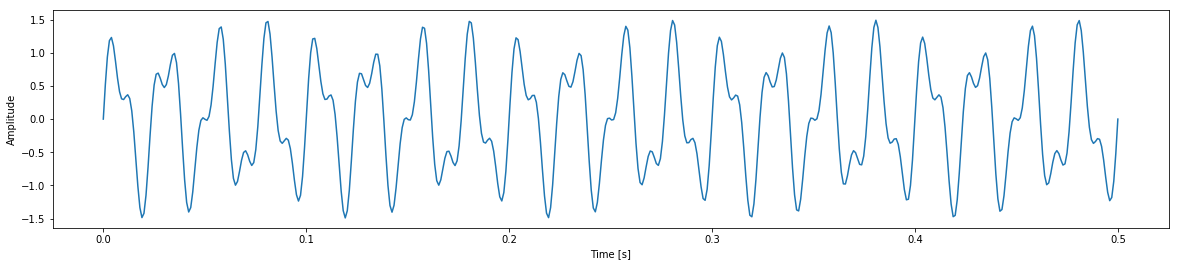

In [0]:
ex_t = np.linspace(0, 0.5, 500)                                           # Example time
ex_s = np.sin(40 * 2 * np.pi * ex_t) + 0.5 * np.sin(90 * 2 * np.pi * ex_t)      # Example signal
plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(ex_t, ex_s)
plt.show()

I constructed this wave above superpositioning two sinusoidalwaves with frequencies are 40,90 and having amplitudes of 1 and 0.5

Now I'm getting the fast fourier transformation of the same wave above. 
Note that Fast fourier transformation is a way of getting the discrete fourier transformation faster than the initial by definition algorithm. Time complexity of DFT is O(N<sup>2</sup> where FFT does it in O(N *log(N)*.
) 
Now lets see how the output would look like

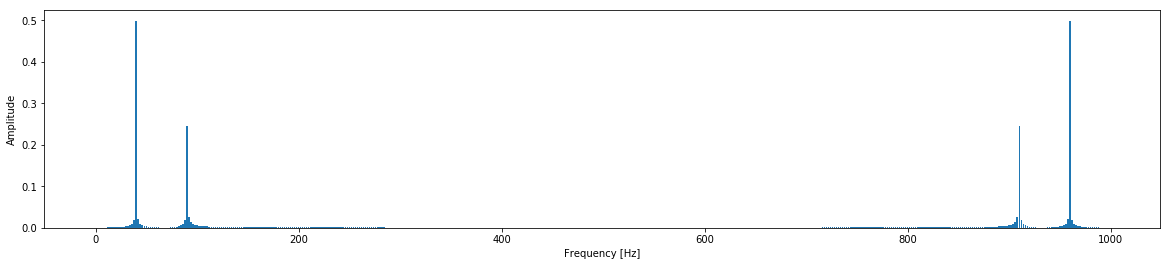

In [0]:
ex_fft = np.fft.fft(ex_s)
T = ex_t[1] - ex_t[0]  # sampling interval 
N = ex_s.size

# 1/T = frequency
ex_f = np.linspace(0, 1 / T, N)

plt.figure(figsize=[20,4])

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(ex_f[:N], np.abs(ex_fft)[:N] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()

FFT in this case has been applied to the 0 to 1000 frequency range. Actually this frequency range is not been used in the algorithm. But when it calculates the fft that frequency range is automatically applied. To learn more about the FFT alorithm check the [wikipedia page](https://en.wikipedia.org/wiki/Fast_Fourier_transform). When we use the result we have to recompute the frequency range by looking at the sampling interval. 

Another important observation is that this plot looks more like a mirror image about 500 Hz. 

> Note that an FFT result is mirrored (as in conjugate symmetric) only if the input data is real.

> For strictly real input data, the two conjugate mirror images in the FFT result cancel out the imaginary parts of any complex sinusoids, and thus sum to a strictly real sinusoid (except for tiny numerical rounding noise), thus leaving you with a representation of strictly real sine waves.

> If the FFT result wasn't conjugate mirrored, it would represent a waveform that had complex values (non-zero imaginary components), not something strictly real valued.

Check out this answer in [dsp.SE](https://dsp.stackexchange.com/questions/4825/why-is-the-fft-mirrored) if you need to learn more about this mirroring. I took the above note from there.

For this case what is valuable to us is only half of the result. which is,

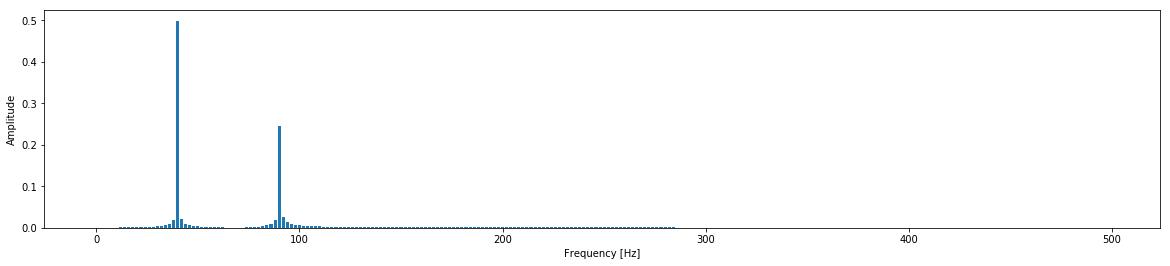

In [0]:
plt.figure(figsize=[20,4])

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(ex_f[:N//2], np.abs(ex_fft)[:N//2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
# plt.xticks(np.arange(ex_f[1],ex_f[N//2], 1.0))
plt.show()

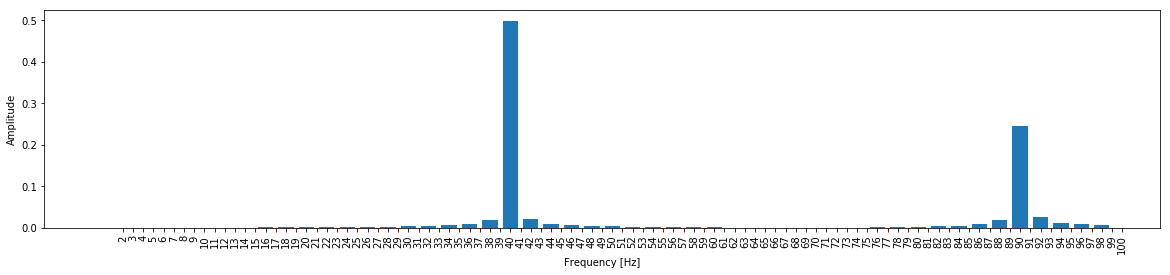

In [0]:
# Zooming in
plt.figure(figsize=[20,4])

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(ex_f[:50], np.abs(ex_fft)[:50] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.xticks(np.arange(ex_f[1],ex_f[50], 1.0),rotation=90)
plt.show()

So now if you look at the result, you'll see that fft is giving two dominent frequencies above all others. They are 40 Hz and 90 Hz, which were the frequency components of the original wave. Also it should be noted that the amplitude is correspondant to the original amplitude, but the value is bit different, this happens because the wave is now replresented as a sum of many waves, so the amplitude is distributed among all of them not only the dominent frequencies.

You might have thought that this would give us the exact frequencies of the original wave. But it doesn't. Instead it helps us to identify what are the possible sinusoidal frequencies that might have constructed the original frequency.

#### So now, lets come back to our original sub problem. Which is removing the noices from the wave.

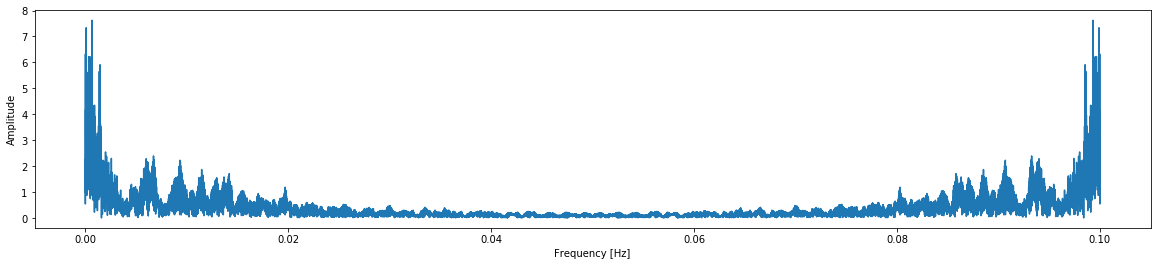

In [0]:
sfftx = scipy.fftpack.fft(s_sx)             # Selected Signal fft x
T = 10                                      #Once ten miliseond   #t_s[1] - t_s[0]  # sampling interval 
N = s_s.size

# 1/T = frequency
f_s = np.linspace(0, 1 / T, N)              # Selected Frequency range

plt.figure(figsize=[20,4])

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f_s[1:N], np.abs(sfftx)[1:N] * 1 / N)  # 1 / N is a normalization factor
plt.show()

This is what we got from the fft, but lets look at half which is helpful to us

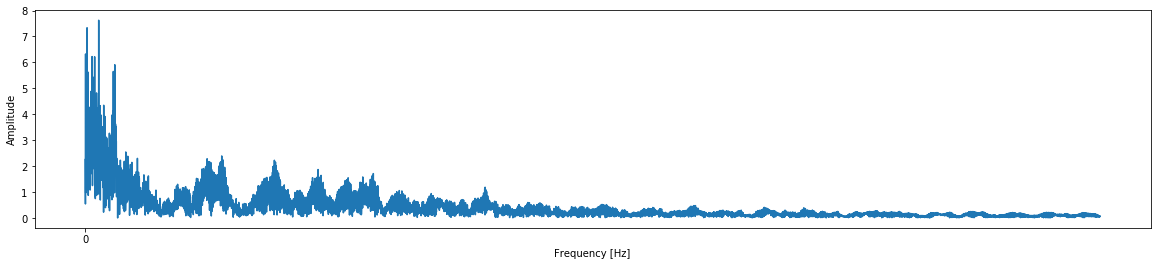

In [0]:
plt.figure(figsize=[20,4])

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f_s[1:N//2], np.abs(sfftx)[1:N//2] * 1 / N)  # 1 / N is a normalization factor
plt.xticks(np.arange(f_s[1],f_s[N//2], 1.0))
plt.show()

Mmm. The result is not quite clean as the example that we discussed. There are two possible reasons.
1. This wave may not be constructed from a sinusoidal waves.
2. The wave is very complex.
3. There might be too much noice in the signal.

But for now with assuming the case 3 lets move forward

In [0]:
sfftxDF = pd.DataFrame(columns=['Frequency','Amplitude'], data=np.asarray([f_s[1:N//2],np.abs(sfftx)[1:N//2]*1/N]).T)

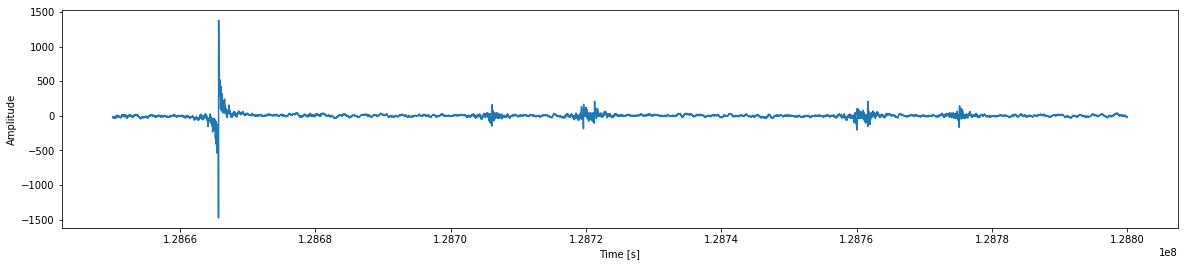

In [0]:
# regenerating the curve fft frequencies
T = s_t.iloc[1]-s_t.iloc[0]

# t = np.linspace(0,T*len(s_t),len(s_t))                           # Each 10 miliseconds
t= s_t
row_one = sfftxDF.iloc[0]
s= row_one['Amplitude']*np.sin(row_one['Frequency']*2*np.pi*t)
for index in range(1,len(sfftxDF)):
    row = sfftxDF.iloc[index]
    s += row['Amplitude']*np.sin(row['Frequency']*2*np.pi*t)
plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

Now Im going to reconstruct the wave using the frequencies with amplitude above 1.

In [0]:
dsfftxDF = sfftxDF.loc[sfftxDF['Amplitude']>1]               # Dominent Frequencies
dsfftxDF.head()

,Frequency,Amplitude
0,0.000007,2.250641
2,0.000020,6.323491
4,0.000033,3.476577
5,0.000040,4.178942
6,0.000047,2.578281


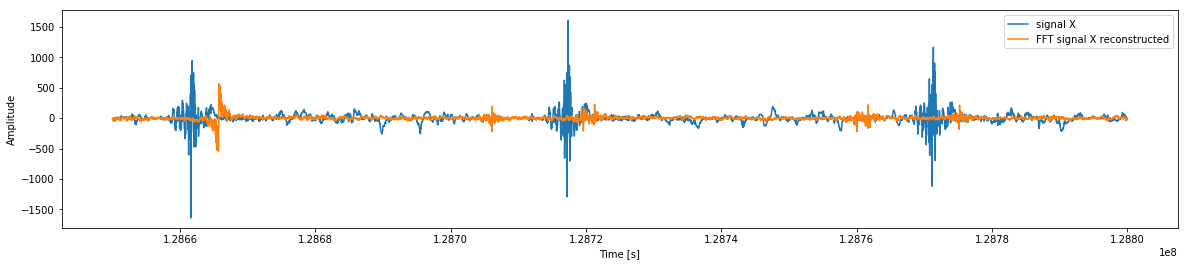

In [0]:
# regenerating the curve with selected frequencies
T = s_t.iloc[1]-s_t.iloc[0]

# t = np.linspace(0,T*len(s_t),len(s_t))                           # Each 10 miliseconds
t= s_t
row_one = dsfftxDF.iloc[0]
s= row_one['Amplitude']*np.sin(row_one['Frequency']*2*np.pi*t)
for index in range(1,len(dsfftxDF)):
    row = dsfftxDF.iloc[index]
    s += row['Amplitude']*np.sin(row['Frequency']*2*np.pi*t)
plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(dfS['time'], dfS['x'],label="signal X")
plt.plot(t, s,label='FFT signal X reconstructed')
plt.legend()
plt.show()

We did above from the general intuition to get the dominent frequencies and then try to reconstruct the original, but the result is vastly changed. Reason behind that if now we have neglected the imaginary components of our fft result during this calculation. All the time we computed the abs and moved from there. But actually the fft value is a complex number. So, in this case we need to use ifft (inverse fast fourier transformation)
Check below.

/home/gayan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


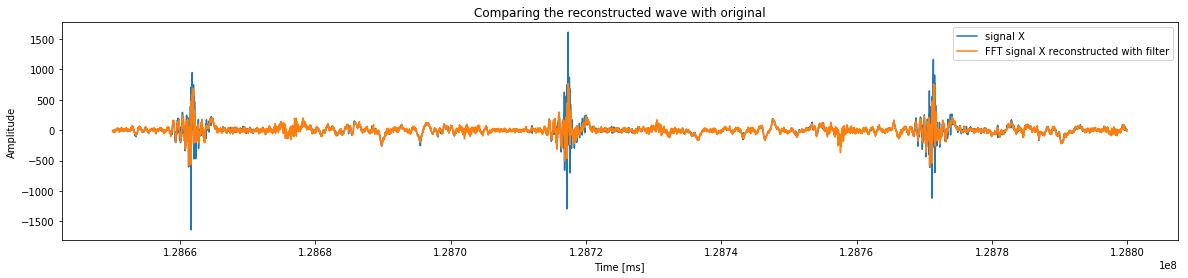

In [0]:
dsfftx = np.array(sfftx, copy=True)                         # Copying the sftx to filter the dominent frequencies
dsfftx[np.abs(dsfftx)*1/N<1]=0                              # We are selecting the frequencies from fft which have normalized amplitude less than 1 and set them to 0
isfftx = scipy.fftpack.ifft(dsfftx)                         # Calculating the inverse fourier transform

fig = plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfS['time'], dfS['x'],label="signal X")
plt.plot(dfS['time'], isfftx.T,label="FFT signal X reconstructed with filter")

plt.legend()
plt.title('Comparing the reconstructed wave with original')
plt.show()

Even though I choose the value 1, it should be a experimental value.
But how ever when we compare the two waves, we can see that we haven't done too much harm to the original signal, but was able to construct a good periodical representation of the original wave.
IMO it would be better if you can select certain frequencies and cancel them out.

But still I see toomany noices in the frequency.
Lets try to remove the highly frequent components, if they are the ones causing all the trouble. Sometimes the noice is all over the signal.

/home/gayan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


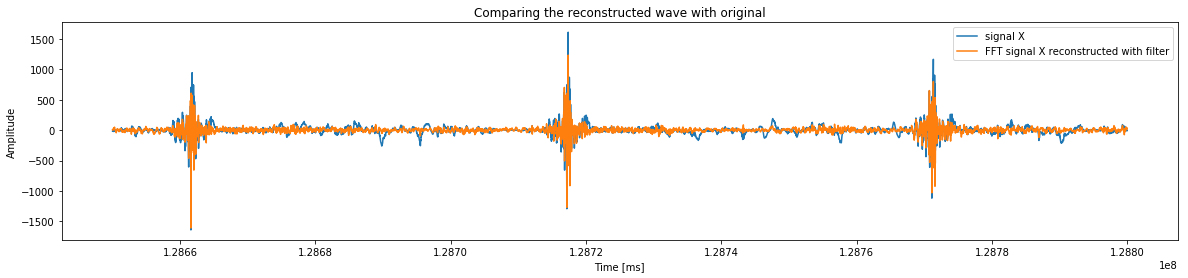

In [0]:
dsfftx = np.array(sfftx, copy=True)                         # Copying the sftx to filter the dominent frequencies
dsfftx[np.abs(dsfftx)*1/N >2 ]=0                              # We are selecting the frequencies from fft which have normalized amplitude less than 1 and set them to 0
isfftx = scipy.fftpack.ifft(dsfftx)                         # Calculating the inverse fourier transform

fig = plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfS['time'], dfS['x'],label="signal X")
plt.plot(dfS['time'], isfftx.T,label="FFT signal X reconstructed with filter")

plt.legend()
plt.title('Comparing the reconstructed wave with original')
plt.show()

### Cool! looks like we finaly found some thing better!
#### Now we found a better signal with low noice.

## Step 02 - Using convolution to clip signals

Let's begin with an example **disclaimer: this example was directly taken from the scipy docs**

In [0]:
from scipy import signal

/home/gayan/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


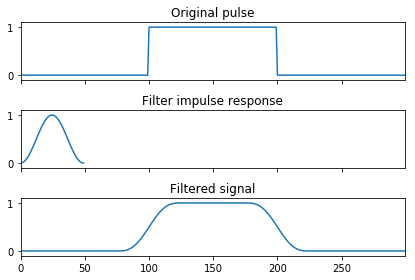

In [0]:
sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

Lets try to understand what happend. 
Convolution is a mathematical function which express how one signal can modify the shape of another signal when they are convolved.
Check the [wiki page](https://en.wikipedia.org/wiki/Convolution) which describe this in detail.

In short for our understanding it would be fair to say that convolution gives the intersection of the two signals.
According to our not so correct analogy we can say that convolution gets the maximum value when the two signals overlap at its best.

This image from [wikipedia](https://upload.wikimedia.org/wikipedia/commons/2/21/Comparison_convolution_correlation.svg) gives a good insight into the operation.:
<img src="https://upload.wikimedia.org/wikipedia/commons/2/21/Comparison_convolution_correlation.svg" alt="convolution descibe image from wikipedia" width="400"/>

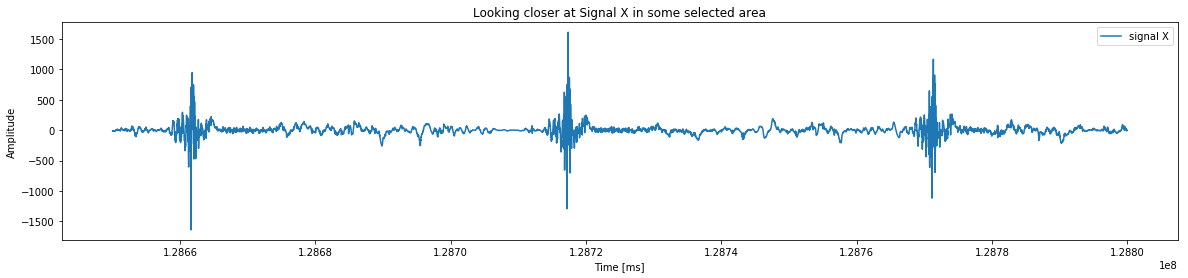

In [0]:
# Now let's select a suitable impulse response

fig = plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfS['time'], dfS['x'],label="signal X")

plt.legend()
plt.title('Looking closer at Signal X in some selected area')
plt.show()

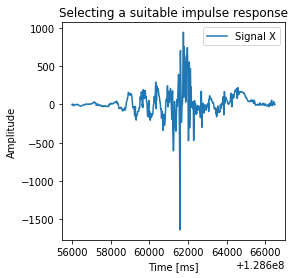

In [0]:
dfP = dfS.loc[(dfS['time']>128656000) & (dfS['time']<128666500)]
fig = plt.figure(figsize=[4,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfP['time'], dfP['x'],label="Signal X")

plt.legend()
plt.title('Selecting a suitable impulse response')
plt.show()

/home/gayan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/gayan/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


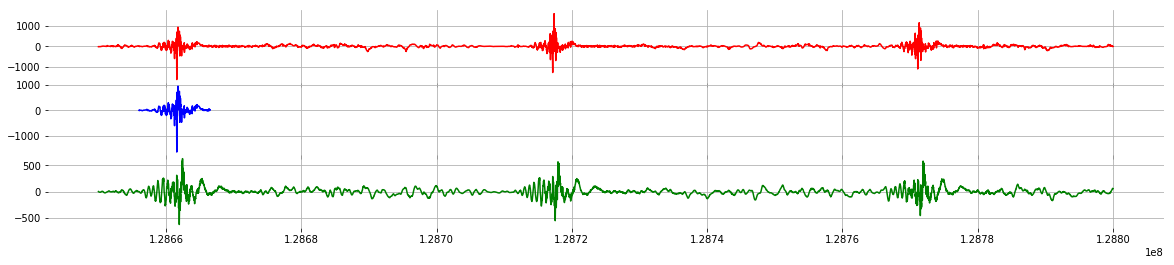

In [0]:
sig = dfS['x']
win = dfP['x']
time= dfS['time']
dfS['filtered_orig'] = signal.convolve(sig, win, mode='same') / sum(win)

fig, (ax_orig,ax_win,ax_filt) = plt.subplots(nrows=3, sharex=True, subplot_kw=dict(frameon=False),figsize=[20,4]) # frameon=False removes frames

plt.subplots_adjust(hspace=.0)
ax_orig.grid()
ax_win.grid()
ax_filt.grid()

ax_orig.plot(time, sig, color='r')
ax_win.plot(dfP['time'], win, color='b')
ax_filt.plot(time,dfS['filtered_orig'],color='g')
fig.show()

In [0]:
dfS['isfftx']=isfftx.T
dfS.head()

/home/gayan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,x,y,z,filtered_orig,isfftx
156794,128650003,-17.694885,-57.459774,-30.277878,4.871518,9.087309+0.000000j
156795,128650013,-19.748878,-61.394608,-30.100101,4.269006,1.519325-0.000000j
156796,128650023,-16.088295,-62.792828,-30.796589,3.484080,1.409519+0.000000j
156797,128650033,-10.384330,-63.306293,-30.888100,2.490565,5.646831+0.000000j
156798,128650043,-11.802687,-62.274178,-29.937283,1.350863,4.848255-0.000000j


Lets try with the fftresults

/home/gayan/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/home/gayan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gayan/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


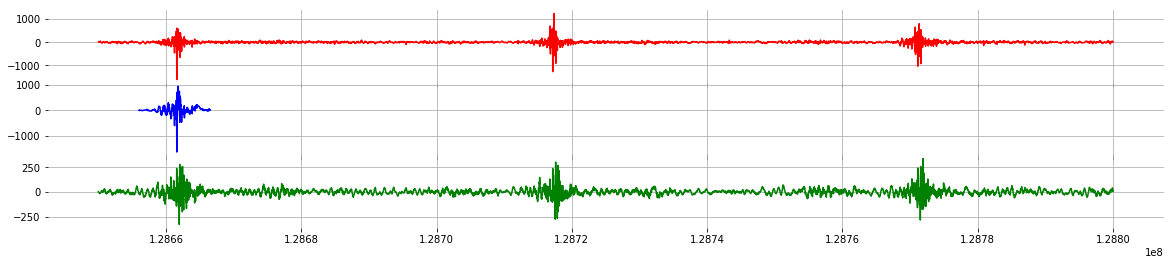

In [0]:
sig = dfS['isfftx']
win = dfP['x']
time= dfS['time']
filtered = signal.convolve(sig, win, mode='same') / sum(win)

fig, (ax_orig,ax_win,ax_filt) = plt.subplots(nrows=3, sharex=True, subplot_kw=dict(frameon=False),figsize=[20,4]) # frameon=False removes frames

plt.subplots_adjust(hspace=.0)
ax_orig.grid()
ax_win.grid()
ax_filt.grid()

ax_orig.plot(time, sig, color='r')
ax_win.plot(dfP['time'], win, color='b')
ax_filt.plot(time,filtered,color='g')
fig.show()

/home/gayan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


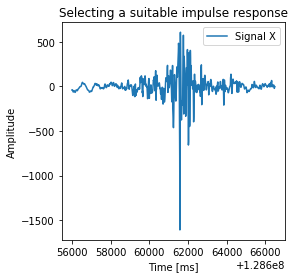

In [0]:
dfP = dfS.loc[(dfS['time']>128656000) & (dfS['time']<128666500)]
fig = plt.figure(figsize=[4,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfP['time'], dfP['isfftx'],label="Signal X")

plt.legend()
plt.title('Selecting a suitable impulse response')
plt.show()

/home/gayan/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/home/gayan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gayan/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


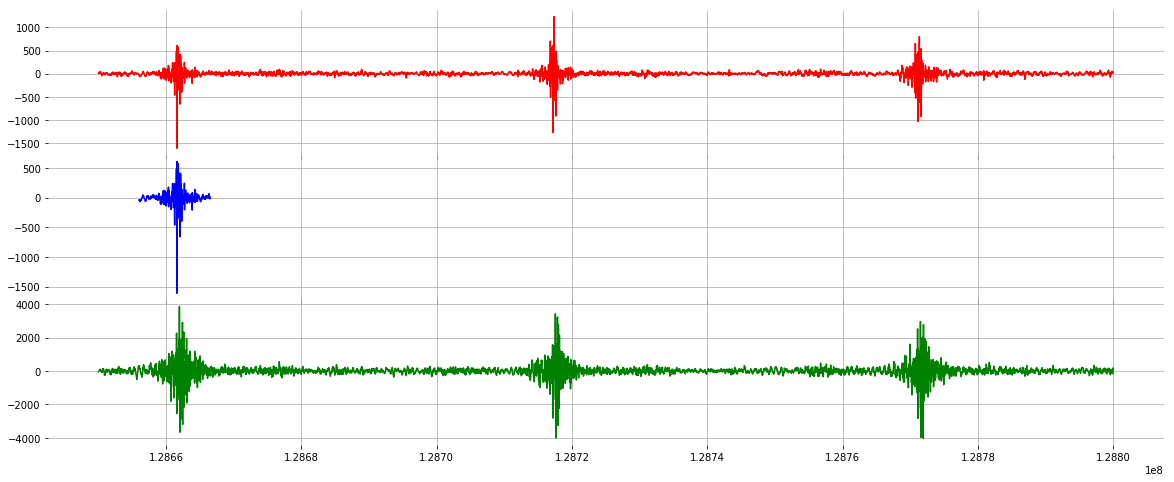

In [0]:
sig = dfS['isfftx']
win = dfP['isfftx']
time= dfS['time']
filtered = signal.convolve(sig, win, mode='same') / sum(win)

fig, (ax_orig,ax_win,ax_filt) = plt.subplots(nrows=3, sharex=True, subplot_kw=dict(frameon=False),figsize=[20,8]) # frameon=False removes frames

plt.subplots_adjust(hspace=.0)
ax_orig.grid()
ax_win.grid()
ax_filt.grid()

ax_orig.plot(time, sig, color='r')
ax_win.plot(dfP['time'], win, color='b')
ax_filt.plot(time,filtered,color='g')
fig.show()

/home/gayan/.local/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
/home/gayan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/gayan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gayan/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: U

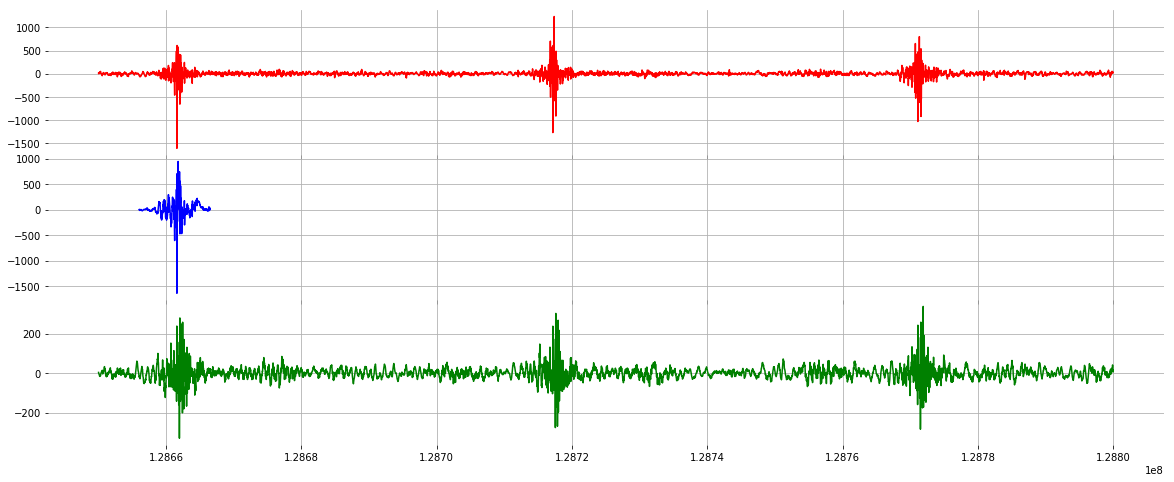

In [0]:
sig = dfS['isfftx']
win = dfP['x']
time= dfS['time']
filtered = signal.convolve(sig, win, mode='same') / sum(win)
dfS['filtered']=filtered
fig, (ax_orig,ax_win,ax_filt) = plt.subplots(nrows=3, sharex=True, subplot_kw=dict(frameon=False),figsize=[20,8]) # frameon=False removes frames

plt.subplots_adjust(hspace=.0)
ax_orig.grid()
ax_win.grid()
ax_filt.grid()

ax_orig.plot(time, sig, color='r')
ax_win.plot(dfP['time'], win, color='b')
ax_filt.plot(time,filtered,color='g')
fig.show()

Now we have to identify the peaks for each successfull convolution.
I'm going to use the non fft output for now since it looks better compared to the fft output

/home/gayan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


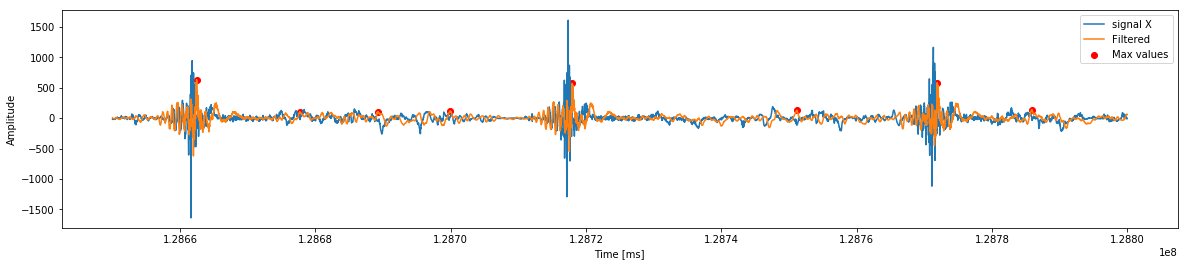

In [0]:
# Find local peaks in the convolution
from scipy.signal import argrelextrema
n=len(dfP)
# df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal, order=n)[0]]['data']
dfS['filtered_orig_max'] = dfS.iloc[argrelextrema(dfS.filtered_orig.values, np.greater_equal, order=n)[0]]['filtered_orig']

fig = plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfS['time'], dfS['x'],label="signal X")
plt.plot(dfS['time'], dfS['filtered_orig'],label="Filtered")
plt.scatter(dfS['time'], dfS['filtered_orig_max'],label="Max values", color='r')

plt.legend()
plt.show()

Some of these max values are not in the actual pulse. Lets remove them by setting a threshold. For this case I'm using 500 as the threshold.

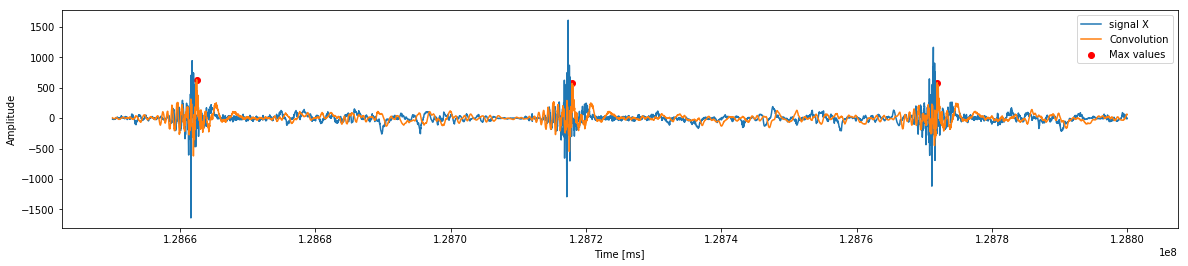

In [0]:
n=len(dfP)
# df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal, order=n)[0]]['data']
dfS['filtered_orig_max'] = dfS.iloc[argrelextrema(dfS.filtered_orig.values, np.greater_equal, order=n)[0]]['filtered_orig']
dfS['filtered_orig_max_threshold']=dfS['filtered_orig_max'].copy(deep=True)
dfS['filtered_orig_max_threshold'].loc[dfS.filtered_orig_max_threshold<500] =np.NaN
fig = plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfS['time'], dfS['x'],label="signal X")
plt.plot(dfS['time'], dfS['filtered_orig'],label="Convolution")
plt.scatter(dfS['time'], dfS['filtered_orig_max_threshold'],label="Max values", color='r')

plt.legend()
plt.show()

These Max values are the middle points of the selected pulse. Now let's perform the clipping.

In [0]:
pulse_width=np.abs(dfP.iloc[-1].time-dfP.iloc[0].time)

middlePoints=dfS[dfS.filtered_orig_max_threshold.notnull()]
dfS['start_pulse']=np.NaN
dfS['end_pulse']=np.NaN
pulse_count = 1
for index,row in middlePoints.iterrows():
    start_time = int(np.abs(row.time - pulse_width//2))
    end_time = row.time + pulse_width//2
    dfS.at[dfS.loc[(dfS.time>start_time) & (dfS.time<start_time+10)].index,"start_pulse"] = pulse_count
    dfS.at[dfS.loc[(dfS.time>end_time)&(dfS.time<end_time+10)].index,"end_pulse"] = pulse_count
    pulse_count+=1

/home/gayan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


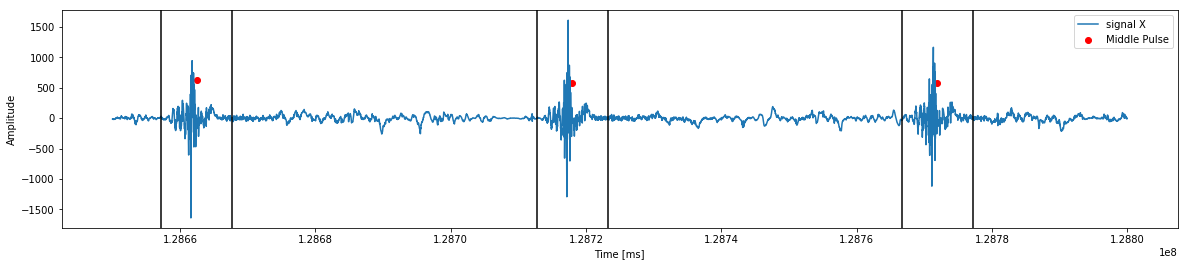

In [0]:
n=len(dfP)
pd.options.mode.chained_assignment = None                              # to get away from the huge warning list on the copy
# df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal, order=n)[0]]['data']
dfS['filtered_orig_max'] = dfS.iloc[argrelextrema(dfS.filtered_orig.values, np.greater_equal, order=n)[0]]['filtered_orig']
dfS['filtered_orig_max_threshold']=dfS['filtered_orig_max'].copy(deep=True)
dfS['filtered_orig_max_threshold'].loc[dfS.filtered_orig_max_threshold<500] =np.NaN

pulse_width=np.abs(dfP.iloc[-1].time-dfP.iloc[0].time)

middlePoints=dfS[dfS.filtered_orig_max_threshold.notnull()]
dfS['start_pulse']=np.NaN
dfS['end_pulse']=np.NaN
pulse_count = 1
for index,row in middlePoints.iterrows():
    start_time = int(np.abs(row.time - pulse_width//2))
    end_time = row.time + pulse_width//2
    dfS.at[dfS.loc[(dfS.time>start_time) & (dfS.time<start_time+10)].index,"start_pulse"] = pulse_count
    dfS.at[dfS.loc[(dfS.time>end_time)&(dfS.time<end_time+10)].index,"end_pulse"] = pulse_count
    pulse_count+=1
    
fig = plt.figure(figsize=[20,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfS['time'], dfS['x'],label="signal X")
# plt.plot(dfS['time'], dfS['filtered_orig'],label="Filtered")
for index,row in dfS[dfS['start_pulse'].notnull()].iterrows():
    plt.axvline(x=row.time,color='k')
for index,row in dfS[dfS['end_pulse'].notnull()].iterrows():
    plt.axvline(x=row.time,color='k')

plt.scatter(dfS['time'], dfS['filtered_orig_max_threshold'],label="Middle Pulse", color='r')

plt.legend()
plt.show()

Lets get this to a one single function

In [0]:
def findPatterns(dfS,dfP,threshold,axis_name,time_name):
    n=len(dfP)
    pd.options.mode.chained_assignment = None                              # to get away from the huge warning list on the copy
    filtered_col = 'filtered_'+axis_name
    filtered_max_col = 'filtered_'+axis_name+'_max'
    filtered_thres_col= 'filtered_'+axis_name+'_threshold'
    start_pulse_col = 'start_pulse_'+axis_name
    end_pulse_col = 'end_pulse_'+axis_name
    # df['min'] = df.iloc[argrelextrema(df.data.values, np.less_equal, order=n)[0]]['data']
    dfS[filtered_col]=signal.convolve(dfS[axis_name], dfP[axis_name], mode='same') / sum(win)
    dfS[filtered_max_col] = dfS.iloc[argrelextrema(dfS[filtered_col].values, np.greater_equal, order=n)[0]][filtered_col]
    dfS[filtered_thres_col]=dfS[filtered_max_col].copy(deep=True)
    dfS[filtered_thres_col].loc[dfS[filtered_thres_col]<threshold] =np.NaN

    pulse_width=np.abs(dfP.iloc[-1][time_name]-dfP.iloc[0][time_name])

    middlePoints=dfS[dfS.filtered_orig_max_threshold.notnull()]
    dfS[start_pulse_col]=np.NaN
    dfS[end_pulse_col]=np.NaN
    pulse_count = 1
    for index,row in middlePoints.iterrows():
        start_time = int(np.abs(row.time - pulse_width//2))
        end_time = row.time + pulse_width//2
        dfS.at[dfS.loc[(dfS[time_name]>start_time) & (dfS[time_name]<start_time+10)].index,start_pulse_col] = pulse_count
        dfS.at[dfS.loc[(dfS[time_name]>end_time)&(dfS[time_name]<end_time+10)].index,end_pulse_col] = pulse_count
        pulse_count+=1

    fig = plt.figure(figsize=[20,4])
    plt.ylabel("Amplitude")
    plt.xlabel("Time [ms]")
    plt.plot(dfS[time_name], dfS[axis_name],label="signal "+axis_name)
    # plt.plot(dfS['time'], dfS['filtered_orig'],label="Filtered")
    for index,row in dfS[dfS[start_pulse_col].notnull()].iterrows():
        plt.axvline(x=row[time_name],color='k')
    for index,row in dfS[dfS[end_pulse_col].notnull()].iterrows():
        plt.axvline(x=row[time_name],color='k')

    plt.scatter(dfS[time_name], dfS[filtered_thres_col],label="Middle Pulse", color='r')
    plt.plot(dfS[time_name], dfS[filtered_col],label="Convolved signal "+axis_name)
    plt.legend()
    plt.show()
    
    return dfS

/home/gayan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


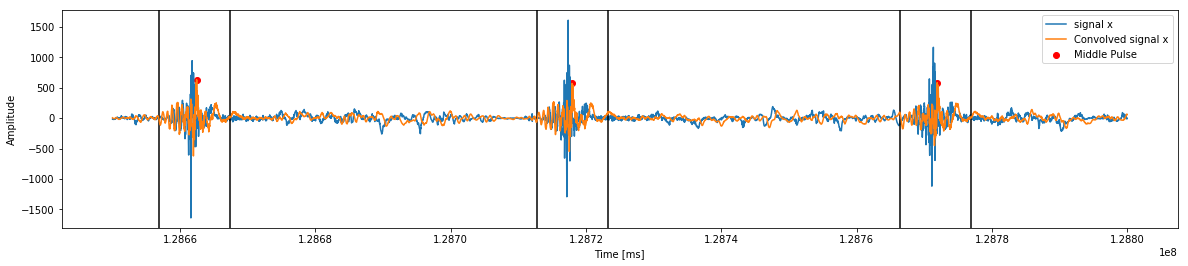

,time,x,y,z,filtered_orig,isfftx,filtered,filtered_orig_max,filtered_orig_max_threshold,start_pulse,end_pulse,filtered_x,filtered_x_max,filtered_x_threshold,start_pulse_x,end_pulse_x
156794,128650003,-17.694885,-57.459774,-30.277878,-3.109444,9.087309+0.000000j,3.883487-0.000000j,NaN,NaN,NaN,NaN,4.871518,NaN,NaN,NaN,NaN
156795,128650013,-19.748878,-61.394608,-30.100101,-3.312138,1.519325-0.000000j,2.831677-0.000000j,NaN,NaN,NaN,NaN,4.269006,NaN,NaN,NaN,NaN
156796,128650023,-16.088295,-62.792828,-30.796589,-3.480268,1.409519+0.000000j,1.506217+0.000000j,NaN,NaN,NaN,NaN,3.484080,NaN,NaN,NaN,NaN
156797,128650033,-10.384330,-63.306293,-30.888100,-3.558811,5.646831+0.000000j,0.005915-0.000000j,NaN,NaN,NaN,NaN,2.490565,NaN,NaN,NaN,NaN
156798,128650043,-11.802687,-62.274178,-29.937283,-3.512812,4.848255-0.000000j,-1.578385-0.000000j,NaN,NaN,NaN,NaN,1.350863,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171786,128799959,-10.582647,-23.316441,-16.632870,-1.996295,22.680352-0.000000j,14.188963-0.000000j,NaN,NaN,NaN,NaN,52.290379,NaN,NaN,NaN,NaN
171787,128799969,-12.402544,-22.055689,-14.014673,-0.093603,25.869733-0.000000j,8.329604-0.000000j,NaN,NaN,NaN,NaN,52.437123,NaN,NaN,NaN,NaN
171788,128799979,-5.834214,-19.544115,-11.970858,1.804316,33.899268-0.000000j,5.663883-0.000000j,NaN,NaN,NaN,NaN,52.870191,NaN,NaN,NaN,NaN
171789,128799989,0.637424,-18.278242,-12.026961,2.354306,38.235564-0.000000j,8.713303-0.000000j,NaN,NaN,NaN,NaN,56.542174,NaN,NaN,NaN,NaN


In [0]:
findPatterns(dfS,dfP,450,'x','time')

# Summary

To detect the patterns
1. try to smooth the signal removing noices ( FFT )
2. Select a desired pattern
3. Find a threshold for the convolved signal. ( This can be done by inspecting the result of 4th step)
3. call the findPatterns function we defined above

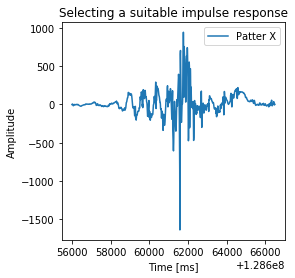

In [0]:
dfP = df.loc[(df['time']>128656000) & (df['time']<128666500)]
fig = plt.figure(figsize=[4,4])
plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")
plt.plot(dfP['time'], dfP['x'],label="Patter X")

plt.legend()
plt.title('Selecting a suitable impulse response')
plt.show()

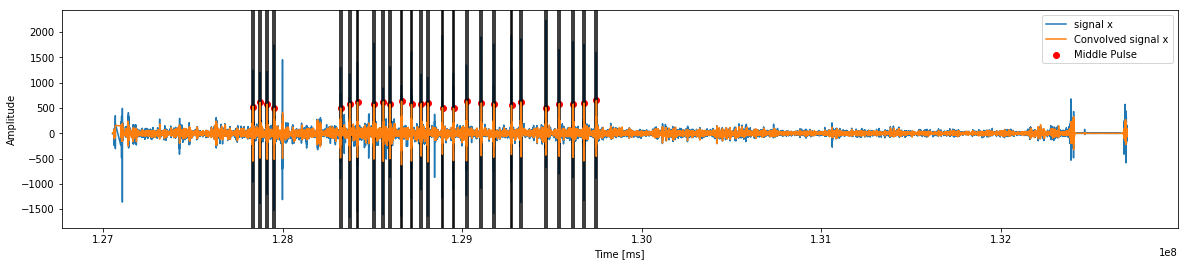

In [0]:
resultDF = findPatterns(df,dfP,450,'x','time')

In [0]:
result.head()

,time,x,y,z,filtered_orig,filtered_orig_max,filtered_orig_max_threshold,start_pulse,end_pulse,filtered_x,filtered_x_max,filtered_x_threshold,start_pulse_x,end_pulse_x
0,127052166,-1.833128,3.201247,6.188703,-0.238487,NaN,NaN,NaN,NaN,-0.238487,NaN,NaN,NaN,NaN
1,127052176,-3.216080,2.814789,4.978779,0.030500,NaN,NaN,NaN,NaN,0.030500,NaN,NaN,NaN,NaN
2,127052186,-2.946732,4.065518,4.948121,0.271988,NaN,NaN,NaN,NaN,0.271988,NaN,NaN,NaN,NaN
3,127052196,-3.470409,4.497561,5.166888,0.451715,NaN,NaN,NaN,NaN,0.451715,NaN,NaN,NaN,NaN
4,127052206,-2.006280,3.984124,5.914111,0.594297,NaN,NaN,NaN,NaN,0.594297,NaN,NaN,NaN,NaN
